In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import nglview
import requests
import os
%matplotlib inline

In [22]:
def plot_distr(i, title=False, savedname=False):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot([0, len(i)], [0.5,0.5], color='black', linewidth=0.7)
    ax.plot(i.sort_values().values)
    ax.set_xlim(0, len(i))
    if savedname:
        plt.savefig(savedname, bbox_inches='tight')
    if title:
        plt.title(title)
    plt.show()

def show_structure(domain):
    if (domain + '.pdb') in os.listdir('structures'):
        return nglview.show_file('./structures/' + domain + '.pdb')
    else:
        r = requests.get('http://www.cathdb.info/version/v4_2_0/api/rest/id/' + domain + '.pdb')
        with open('./structures/' + domain + '.pdb', 'w') as file:
            file.write(r.text)
        return nglview.show_file('./structures/' + domain + '.pdb')
    
def scrape_sfam(df, gr):
    dom_len = pd.Series()
    s = pd.Series()
    stand_dev = pd.Series()
    for n, d in gr:
        s[n] = d.DIS.mean()
        stand_dev[n] = d.DIS.std()
        dom_len[n] = d.LEN.mean()
    size = df.SFAM.value_counts()
    sfam = pd.DataFrame({'SIZE' : size,
                         'STD_DEV' : stand_dev,
                         'LEN' : dom_len,
                         'DIS' : s})
    return sfam

In [23]:
df = pd.read_csv('./compiled.tsv', sep='\t', index_col=0)

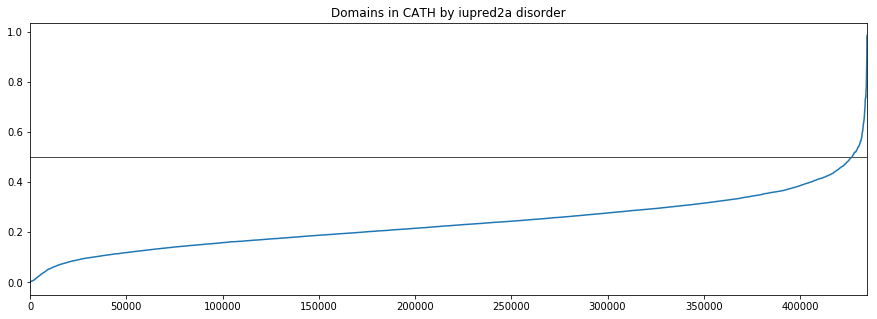

In [24]:
plot_distr(df.DIS, savedname='./figs/all_domains.png', title='Domains in CATH by iupred2a disorder')

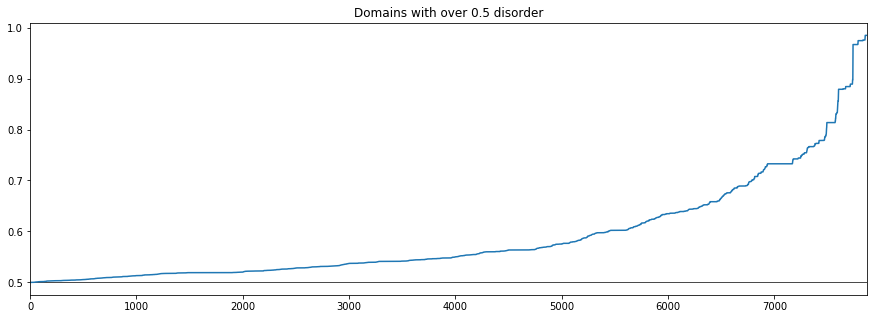

In [25]:
plot_distr(df[df['DIS']>0.5]['DIS'], savedname='./figs/over_50_domains.png', title='Domains with over 0.5 disorder')

In [26]:
over = df[df['DIS']>0.9]
over.SFAM.value_counts()

4.10.990.10    66
1.20.5.560     64
1.20.5.640      3
Name: SFAM, dtype: int64

In [27]:
gr = df.groupby('SFAM')

In [28]:
sfam = scrape_sfam(df, gr)

In [29]:
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.DIS[sfam.DIS>0.5])/len(sfam.DIS)*100,3))
print("Proportion of domains with disorder over 0.5")
print(round(len(df.DIS[df.DIS > 0.5])/len(df)*100, 3))

Proportion of superfamilies with disorder over 0.5
3.072
Proportion of domains with disorder over 0.5
1.81


In [30]:
print('Correllation between size of a superfamily and standard deviation in disorder')
print(round(sfam.STD_DEV.corr(sfam.SIZE), 3))
print('Correllation between length of a domain and standard deviation in disorder')
print(round(sfam.STD_DEV.corr(sfam.LEN), 3))

Correllation between size of a superfamily and standard deviation in disorder
0.132
Correllation between length of a domain and standard deviation in disorder
-0.073


In [31]:
df.sort_values(by='DIS', ascending=False).head(30)

,C,A,T,H,S35,S60,S95,S100,S100s,LEN,RES,DIS,SFAM
DOMAIN,,,,,,,,,,,,,
1q86Q02,1,20,5,560,1,1,1,2,11,33,3.00,0.984709,1.20.5.560
1kc8Q03,1,20,5,560,1,1,1,2,13,33,3.01,0.984709,1.20.5.560
3ow2O02,1,20,5,560,1,1,1,2,1,33,2.70,0.984709,1.20.5.560
1q81Q02,1,20,5,560,1,1,1,2,4,33,2.95,0.984709,1.20.5.560
1q82Q02,1,20,5,560,1,1,1,2,5,33,2.98,0.984709,1.20.5.560
1k8aQ03,1,20,5,560,1,1,1,2,6,33,3.00,0.984709,1.20.5.560
1k9mQ03,1,20,5,560,1,1,1,2,7,33,3.00,0.984709,1.20.5.560
1kd1Q03,1,20,5,560,1,1,1,2,8,33,3.00,0.984709,1.20.5.560
1n8rQ03,1,20,5,560,1,1,1,2,9,33,3.00,0.984709,1.20.5.560


In [32]:
show_structure('1q86Q02')

A Jupyter Widget

In [33]:
show_structure('1jj2K01')

A Jupyter Widget

In [34]:
df.sort_values(by='DIS').head(30)

,C,A,T,H,S35,S60,S95,S100,S100s,LEN,RES,DIS,SFAM
DOMAIN,,,,,,,,,,,,,
1mt2001,4,10,10,10,1,1,1,1,2,60,1000.00,0.000002,4.10.10.10
4mt2A00,4,10,10,10,1,1,1,1,1,61,2.00,0.000040,4.10.10.10
2mt2000,4,10,10,10,1,1,1,2,1,61,1000.00,0.000040,4.10.10.10
1p9zA00,3,30,60,10,1,1,1,2,1,40,999.00,0.000122,3.30.60.10
1p9gA00,3,30,60,10,1,1,1,1,1,40,0.84,0.000122,3.30.60.10
1aqrA00,4,10,650,10,1,1,1,1,3,40,999.00,0.000215,4.10.650.10
1aqqA00,4,10,650,10,1,1,1,1,2,40,999.00,0.000215,4.10.650.10
1aooA00,4,10,650,10,1,1,1,1,1,40,999.00,0.000215,4.10.650.10
1fmyA00,4,10,650,10,1,1,1,1,4,40,999.00,0.000215,4.10.650.10


In [35]:
show_structure('5aw0B01')

A Jupyter Widget

In [46]:
sfam[sfam.SIZE == 1].sort_values('DIS', ascending=False)

,DIS,LEN,SIZE,STD_DEV
1.10.8.830,0.884125,47.0,1,NaN
1.20.5.1130,0.875669,36.0,1,NaN
4.10.710.10,0.831214,44.0,1,NaN
4.10.1080.10,0.757277,127.0,1,NaN
3.30.160.420,0.751154,26.0,1,NaN
3.30.730.30,0.744892,71.0,1,NaN
3.30.1310.30,0.742811,61.0,1,NaN
4.10.720.10,0.738568,41.0,1,NaN
2.160.30.20,0.730185,54.0,1,NaN
1.20.5.520,0.723600,41.0,1,NaN


In [38]:
show_structure('4dt5A00')

A Jupyter Widget

In [59]:
!./iupred2a.py ./individual_fasta/2.150.10.20/4dt5A00 short > test_short.results

In [60]:
l = pd.read_csv('./test_long.results', sep='\t', index_col=0)
s = pd.read_csv('./test_short.results', sep='\t', index_col=0)


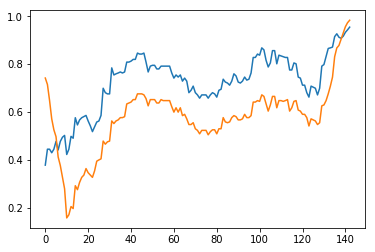

In [64]:
plt.plot(l.DIS.values)
plt.plot(s.DIS.values)
plt.show()

In [57]:
dat.DIS.mean()

0.7219783216783217

In [66]:
s.mean()

DIS    0.574745
dtype: float64